In [138]:
from scipy import *
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from pylab import *

def curve_fit_custom(f, xdata, ydata, p0=None, sigma=None, **kw):
    """
    Pass all arguments to curve_fit, which uses non-linear least squares
    to fit a function, f, to data.  Calculate the uncertaities in the
    fit parameters from the covariance matrix.
    """
    popt, pcov = curve_fit(f, xdata, ydata, p0, sigma, **kw)

    if sigma is None:
        chi2 = sum(((f(xdata,*popt)-ydata))**2)
    else:
        chi2 = sum(((f(xdata,*popt)-ydata)/sigma)**2)
    dof = len(ydata) - len(popt)
    rchi2 = chi2/dof
    print ('results of general_fit:')
    print ('   chi squared = ', chi2)
    print ('   degrees of freedom = ', dof)
    print ('   reduced chi squared = ', rchi2)

    # The uncertainties are the square roots of the diagonal elements
    punc = zeros(len(popt))
    for i in arange(0,len(popt)):
        punc[i] = sqrt(pcov[i,i])
    return popt, punc, rchi2, dof

from scipy.stats import chi2
import matplotlib.patches as mpatches
from matplotlib.pyplot import errorbar
import math as m
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt



In [139]:
udecayt,utimes =loadtxt('c3.data',delimiter=' ',usecols=(0,1),skiprows=0,unpack=True)
#decayt,times =loadtxt('c1.data',delimiter=' ',usecols=(0,1),skiprows=0,unpack=True)
#print(udecayt.shape)
#print(utimes.shape)
#print(udecayt)
#print(utimes)
index = 0
#decayt = np.empty(2680)
#times = np.empty(2680)
decayt = []
times = []
#print(decayt)
#print(decayt.shape)

for i in range(0, len(udecayt), 1):
    if (udecayt[i] < 20000):
        decayt.append(udecayt[i])
        #times.append(times[i])

print(len(decayt))
#print(times)

2680


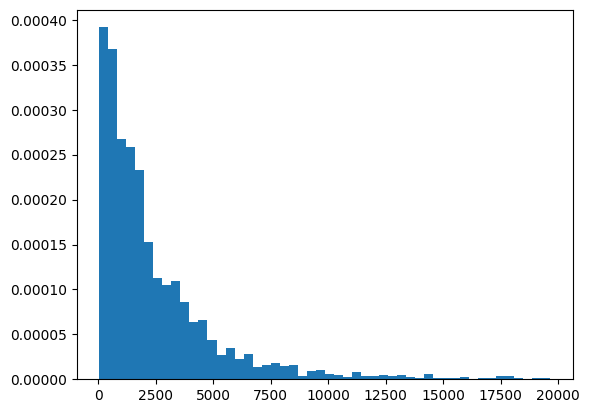

In [140]:
#figure(figsize=(10,10))
plt.hist(decayt, bins = 50,density = True)
show()


In [148]:
bins = np.linspace(0, 20000, 50)
print(bins)
decayCounts = []
for i in range(0, len(bins), 1):
    counts = 0
    for j in range(0, len(decayt), 1):
        if ((decayt[j] > bins[i]) and (decayt[j] < bins[i+1])):
            counts += 1
    decayCounts.append((counts/2680))
bins * (0.0001)
decayCounts = np.array(decayCounts)
print(decayCounts)
pg1=[0.0005, 0.0005]


def f(x,k,c):
    return k*exp(-x*c)

(popt, punc, rc, d) = curve_fit_custom(f, bins, decayCounts,pg1)
print('k=',popt[0])
print('k-unc=',punc[0])
print('c=',popt[1])
print('c-unc=',punc[1])
print("t1=",1/popt[0])
print("t2=",1/popt[1])

[    0.           408.16326531   816.32653061  1224.48979592
  1632.65306122  2040.81632653  2448.97959184  2857.14285714
  3265.30612245  3673.46938776  4081.63265306  4489.79591837
  4897.95918367  5306.12244898  5714.28571429  6122.44897959
  6530.6122449   6938.7755102   7346.93877551  7755.10204082
  8163.26530612  8571.42857143  8979.59183673  9387.75510204
  9795.91836735 10204.08163265 10612.24489796 11020.40816327
 11428.57142857 11836.73469388 12244.89795918 12653.06122449
 13061.2244898  13469.3877551  13877.55102041 14285.71428571
 14693.87755102 15102.04081633 15510.20408163 15918.36734694
 16326.53061224 16734.69387755 17142.85714286 17551.02040816
 17959.18367347 18367.34693878 18775.51020408 19183.67346939
 19591.83673469 20000.        ]
[0.14850746 0.14253731 0.11753731 0.09813433 0.09589552 0.06119403
 0.04216418 0.04552239 0.04067164 0.03283582 0.02910448 0.02052239
 0.01604478 0.01156716 0.01268657 0.01044776 0.00783582 0.00597015
 0.00746269 0.00597015 0.00671642 0

C:\Users\ygbig\AppData\Local\Temp\ipykernel_17356\2220285024.py:17: RuntimeWarning: overflow encountered in exp
  return k*exp(-x*c)


In [152]:
bins = np.linspace(min(decayt), max(decayt), 50)
print(bins)
decayCounts = np.histogram(decayt,50, density=True)[0]
#for i in range(0, len(bins) -1, 1):
#    counts = 0
#    for j in range(0, len(decayt), 1):
#        if ((decayt[j] > bins[i]) and (decayt[j] < bins[i+1])):
#            counts += 1
#    decayCounts.append((counts/2680))

print(decayCounts)
#print(len(decayCounts))
pg1=[0.0005, 0.0005]


def f(x,k,c):
    return k*exp(-x*c)

(popt, punc, rc, d) = curve_fit_custom(f, bins, decayCounts,pg1)
print('k=',popt[0])
print('k-unc=',punc[0])
print('c=',popt[1])
print('c-unc=',punc[1])

[   40.           440.40816327   840.81632653  1241.2244898
  1641.63265306  2042.04081633  2442.44897959  2842.85714286
  3243.26530612  3643.67346939  4044.08163265  4444.48979592
  4844.89795918  5245.30612245  5645.71428571  6046.12244898
  6446.53061224  6846.93877551  7247.34693878  7647.75510204
  8048.16326531  8448.57142857  8848.97959184  9249.3877551
  9649.79591837 10050.20408163 10450.6122449  10851.02040816
 11251.42857143 11651.83673469 12052.24489796 12452.65306122
 12853.06122449 13253.46938776 13653.87755102 14054.28571429
 14454.69387755 14855.10204082 15255.51020408 15655.91836735
 16056.32653061 16456.73469388 16857.14285714 17257.55102041
 17657.95918367 18058.36734694 18458.7755102  18859.18367347
 19259.59183673 19660.        ]
[3.91772027e-04 3.67048549e-04 2.67203737e-04 2.58645610e-04
 2.32971229e-04 1.53095379e-04 1.13157454e-04 1.04599328e-04
 1.09353842e-04 8.65321709e-05 6.37104995e-05 6.56123054e-05
 4.37415370e-05 2.66252834e-05 3.51834102e-05 2.2821671

t1= 2398.518622834277
t2= 2240.6146677480356


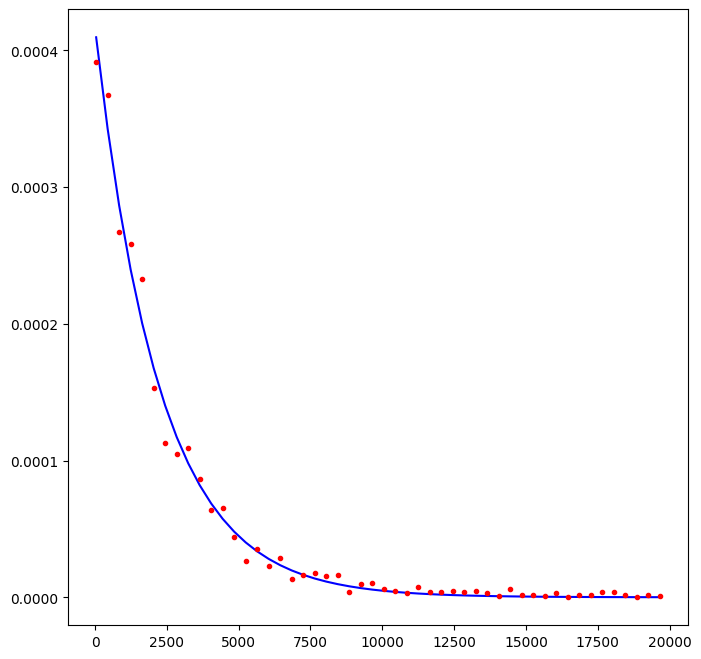

In [153]:
print("t1=",1/popt[0])
print("t2=",1/popt[1])
fit = f(bins, k=popt[0], c=popt[1])
figure(figsize=(8,8))
plot(bins, fit, 'b-')
plot(bins, decayCounts,'r.')
show()